In [21]:
#Import
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import linearmodels as plm
from matplotlib import pyplot as plt
import scipy
import scipy.stats as stats

In [22]:
#Province Data
AUSARH = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/province/AUSARH.csv',index_col=0).T
GDR = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/province/GDR.csv',index_col=0).T
HIR = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/province/HIR.csv',index_col=0).T
NPGR = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/province/NPGR.csv',index_col=0).T
SARH = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/province/SARH.csv',index_col=0).T
SPRH = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/province/SPRH.csv',index_col=0).T
DPI = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/province/DPI.csv',index_col=0).T
UP = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/province/UP.csv',index_col=0).T
UPC = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/province/UPC.csv',index_col=0).T
UPCR = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/province/UPCR.csv',index_col=0).T
HPG = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/province/HPG.csv',index_col=0).T
EDU = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/data_clean/EDU.csv',index_col=0).T
FS = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/data_clean/FAM.csv',index_col=0).T
GDP = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/data_clean/GDP.csv',index_col=0).T
GEN = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/data_clean/GEN.csv',index_col=0).T
POP = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/data_clean/POP.csv',index_col=0).T
UR = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/data_clean/URB.csv',index_col=0).T
URC = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/data_clean/URBC.csv',index_col=0).T
URCI = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/data_clean/URCI.csv',index_col=0).T
GRD = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/data_clean/GRD.csv',index_col=0).T

In [23]:
#Create Dataset
AUSARH['province'] = AUSARH.index.str.replace(" ", "")
GDR['province'] = GDR.index.str.replace(" ", "")
HIR['province'] = HIR.index.str.replace(" ", "")
NPGR['province'] = NPGR.index.str.replace(" ", "")
SARH['province'] = SARH.index.str.replace(" ", "")
SPRH['province'] = SPRH.index.str.replace(" ", "")
UP['province'] = UP.index.str.replace(" ", "")
EDU['province'] = EDU.index.str.replace(" ", "")
FS['province'] = FS.index.str.replace(" ", "")
GDP['province'] = GDP.index.str.replace(" ", "")
GEN['province'] = GEN.index.str.replace(" ", "")
POP['province'] = POP.index.str.replace(" ", "")
UR['province'] = UR.index.str.replace(" ", "")
URC['province'] = URC.index.str.replace(" ", "")
DPI['province'] = DPI.index.str.replace(" ", "")
HPG['province'] = HPG.index.str.replace(" ", "")
GRD['province'] = GRD.index.str.replace(" ", "")
UPC['province'] = UPC.index.str.replace(" ", "")
UPCR['province'] = UPCR.index.str.replace(" ", "")
URCI['province'] = URCI.index.str.replace(" ", "")

melted_AUSARH = pd.melt(AUSARH, id_vars=['province'], value_vars=[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
melted_GDR = pd.melt(GDR, id_vars=['province'], value_vars=[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
melted_HIR = pd.melt(HIR, id_vars=['province'], value_vars=[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
melted_NPGR = pd.melt(NPGR, id_vars=['province'], value_vars=[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
melted_SARH = pd.melt(SARH, id_vars=['province'], value_vars=[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
melted_SPRH = pd.melt(SPRH, id_vars=['province'], value_vars=[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
melted_UP = pd.melt(UP, id_vars=['province'], value_vars=[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
melted_EDU = pd.melt(EDU, id_vars=['province'], value_vars=[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
melted_FS = pd.melt(FS, id_vars=['province'], value_vars=[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
melted_GDP = pd.melt(GDP, id_vars=['province'], value_vars=[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
melted_GEN = pd.melt(GEN, id_vars=['province'], value_vars=[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
melted_POP = pd.melt(POP, id_vars=['province'], value_vars=[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
melted_UR = pd.melt(UR, id_vars=['province'], value_vars=[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
melted_URC = pd.melt(URC, id_vars=['province'], value_vars=[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
melted_DPI = pd.melt(DPI, id_vars=['province'], value_vars=[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
melted_HPG = pd.melt(HPG, id_vars=['province'], value_vars=[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
melted_GRD = pd.melt(GRD, id_vars=['province'], value_vars=[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
melted_UPC = pd.melt(UPC, id_vars=['province'], value_vars=[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
melted_UPCR = pd.melt(UPCR, id_vars=['province'], value_vars=[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
melted_URCI = pd.melt(URCI, id_vars=['province'], value_vars=[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])

panel = pd.DataFrame({'province': melted_AUSARH['province'], 'year': melted_AUSARH['Year'], 'AUSARH': melted_AUSARH['value'], 'GDR': melted_GDR['value'], 'HIR': melted_HIR['value'], 'NPGR': melted_NPGR['value'], 'SARH': melted_SARH['value'], 'SPRH': melted_SPRH['value'], 'UP': melted_UP['value'], 'EDU': melted_EDU['value'], 'FS': melted_FS['value'], 'GDP': melted_GDP['value'], 'GEN': melted_GEN['value'], 'POP': melted_POP['value'], 'UR': melted_UR['value'], 'URC': melted_URC['value'], 'DPI': melted_DPI['value'], 'HPG': melted_HPG['value'], 'GRD': melted_GRD['value'], 'UPC': melted_UPC['value'], 'UPCR': melted_UPCR['value'], 'URCI': melted_URCI['value']})
panel['AUSARH_log'] = np.log(panel['AUSARH'])
panel['SARH_log'] = np.log(panel['SARH'])
panel['SPRH_log'] = np.log(panel['SPRH'])
panel['DPI_log'] = np.log(panel['DPI'])
panel['HIR_log'] = np.log(panel['HIR'])
panel['UR'] = panel['UR']/100
panel['EDU'] = panel['EDU']/100
panel['GDR'] = panel['GDR']/100
panel['GRD'] = panel['GRD']/100

In [24]:
#Def VIF
def drop_column_using_vif_(df, thresh=5):
    while True:
        df_with_const = add_constant(df)
        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()
        vif_df = vif_df.drop('const')
        if vif_df.VIF.max() > thresh:
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            break
    return df

In [25]:
#VIF
vifcontent = panel[['FS','GDR','GRD','UR','EDU','HPG']]
vifresult = drop_column_using_vif_(vifcontent)
print(vifresult)

       FS    GDR     GRD      UR     EDU       HPG
0    2.87  0.286  0.1229  0.8015  0.2049  0.941130
1    3.07  0.339  0.0130  0.7327  0.1057  1.047158
2    3.52  0.405  0.0318  0.3045  0.0469  1.027341
3    3.61  0.437  0.0614  0.3773  0.0463  1.063751
4    3.14  0.363  0.0584  0.4448  0.0564  1.017004
..    ...    ...     ...     ...     ...       ...
615  2.69  0.452  0.0426  0.6363  0.2201  0.990334
616  3.00  0.475  0.0345  0.5333  0.1726  0.920116
617  3.00  0.440  0.0119  0.6094  0.1672  0.934191
618  2.78  0.430  0.0411  0.6607  0.2017  1.043922
619  2.97  0.423  0.0729  0.5724  0.1916  0.983719

[620 rows x 6 columns]


In [26]:
#混合OLS
ols_y = panel['SARH_log']
ols_x = panel[['FS','GDR','GRD','URCI','EDU','HPG','HIR']]
olsresult = sm.OLS(endog = ols_y, exog = sm.add_constant(ols_x)).fit()
olsresult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               SARH_log   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     80.96
Date:                Sun, 15 Jan 2023   Prob (F-statistic):           6.34e-83
Time:                        18:06:08   Log-Likelihood:                -811.29
No. Observations:                 620   AIC:                             1639.
Df Residuals:                     612   BIC:                             1674.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.6275      2.302      6.787      0.000      11.106      20.149
FS            -2.6349      0.121    -21.796      0.000      -2.872      -2.397
GDR            3.8315      0.600      6.382      0.000       2.652       5.011
GRD            4.4147      1.162      3.800      0.000       2.133       6.696
URCI          -1.0329      2.260     -0.457      0.648      -5.472       3.406
EDU           -4.3758      0.792     -5.528      0.000      -5.930      -2.821
HPG            0.2891      0.422      0.686      0.493      -0.539       1.117
HIR           -1.3183      0.679     -1.940      0.053      -2.652       0.016
==============================================================================
Omnibus:                        1.520   Durbin-Watson:                   1.363
Prob(Omnibus):                  0.468   Jarque-Bera (JB):                1.340
Skew:                          -0.078   Prob(JB):                        0.512
Kurtosis:                       3.167   Cond. No.                         325.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
#固定效应模型1
fixed_model = sm.OLS.from_formula("SARH_log ~ FS + GDR + EDU + UR + HPG + GRD + C(province)", data = panel)
fixed_result = fixed_model.fit()
print(fixed_result.summary())
print(fixed_result.params)

                            OLS Regression Results                            
Dep. Variable:               SARH_log   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     259.1
Date:                Sun, 15 Jan 2023   Prob (F-statistic):               0.00
Time:                        18:06:08   Log-Likelihood:                -136.22
No. Observations:                 620   AIC:                             346.4
Df Residuals:                     583   BIC:                             510.3
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [28]:
#随机效应模型1
random_model = sm.MixedLM.from_formula("SARH_log ~ FS + GDR + EDU + UR + HPG + GRD", groups = 'province', data = panel)
random_result = random_model.fit()
print(random_result.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: SARH_log 
No. Observations: 620     Method:             REML     
No. Groups:       31      Scale:              0.0967   
Min. group size:  20      Log-Likelihood:     -247.8633
Max. group size:  20      Converged:          Yes      
Mean group size:  20.0                                 
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     4.912    0.481 10.207 0.000  3.969  5.855
FS           -0.328    0.082 -4.013 0.000 -0.488 -0.168
GDR          -2.847    0.324 -8.777 0.000 -3.482 -2.211
EDU          -4.040    0.504 -8.010 0.000 -5.028 -3.051
UR            8.797    0.300 29.322 0.000  8.209  9.385
HPG           0.461    0.139  3.307 0.001  0.188  0.734
GRD          -0.369    0.519 -0.711 0.477 -1.386  0.648
province Var  1.830    1.578                           



In [65]:
#基于plm建立数据集
regcontent = panel.set_index(['province'], drop=False)

#固定效应模型2
reg_fe = plm.PanelOLS.from_formula(formula = "SARH_log ~ FS + GDR + EDU + UR + HPG + GRD + EntityEffects", data = regcontent)
results_fe = reg_fe.fit()
print(results_fe)

NameError: name 'generate_panel_data' is not defined

In [30]:
#随机效应模型2
reg_re = plm.RandomEffects.from_formula(formula = "SARH_log ~ FS + GDR + EDU + UR + HPG + GRD + EntityEffects", data = regcontent)
results_re = reg_re.fit()
print(results_re)

                        RandomEffects Estimation Summary                        
Dep. Variable:               SARH_log   R-squared:                        0.8656
Estimator:              RandomEffects   R-squared (Between):              0.9625
No. Observations:                 620   R-squared (Within):               0.7435
Date:                Sun, Jan 15 2023   R-squared (Overall):              0.9609
Time:                        18:06:08   Log-likelihood                   -244.25
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      659.23
Entities:                          31   P-value                           0.0000
Avg Obs:                       20.000   Distribution:                   F(6,614)
Min Obs:                       20.000                                           
Max Obs:                       20.000   F-statistic (robust):             659.23
                            

In [31]:
#Hausman test
b_fe = results_fe.params
b_re = results_re.params
b_diff = b_fe - b_re
v_fe = results_fe.cov
v_re = results_re.cov
v_diff = v_fe - v_re
df = len(b_fe)

table = pd.DataFrame({'FE':b_fe,'RE':b_re,'Difference':b_diff,'sqrt(diag(v_fe-v_re))':np.sqrt(np.diag(v_diff))})
chi2 = np.dot(b_diff.T,  np.linalg.inv(v_diff).dot(b_diff))
pval = 1 - stats.chi2.cdf(chi2, df)

print(table)
print()
print(f'chi-Squared: {chi2:.2f}')
print(f'degrees of freedom: {df}')
print(f'p-Value:{pval:.5f}')

           FE         RE  Difference  sqrt(diag(v_fe-v_re))
EDU -3.986615  -3.668224   -0.318391                    NaN
FS  -0.309795   0.358625   -0.668420               0.055654
GDR -2.969091  -1.529905   -1.439187                    NaN
GRD -0.411695   0.844510   -1.256205                    NaN
HPG  0.468623   1.221206   -0.752583                    NaN
UR   8.882255  10.433409   -1.551154               0.069792

chi-Squared: 114.23
degrees of freedom: 6
p-Value:0.00000


<ipython-input-31-0bda72ce7266>:10: RuntimeWarning: invalid value encountered in sqrt
  table = pd.DataFrame({'FE':b_fe,'RE':b_re,'Difference':b_diff,'sqrt(diag(v_fe-v_re))':np.sqrt(np.diag(v_diff))})


In [32]:
#固定效应模型3-删除GRD
reg_fe = plm.PanelOLS.from_formula(formula = "SARH_log ~ FS + GDR + EDU + UR + HPG + EntityEffects", data = regcontent)
results_fe = reg_fe.fit()
print(results_fe)

                          PanelOLS Estimation Summary                           
Dep. Variable:               SARH_log   R-squared:                        0.7855
Estimator:                   PanelOLS   R-squared (Between):              0.5701
No. Observations:                 620   R-squared (Within):               0.7855
Date:                Sun, Jan 15 2023   R-squared (Overall):              0.5716
Time:                        18:06:09   Log-likelihood                   -136.55
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      427.65
Entities:                          31   P-value                           0.0000
Avg Obs:                       20.000   Distribution:                   F(5,584)
Min Obs:                       20.000                                           
Max Obs:                       20.000   F-statistic (robust):             427.65
                            

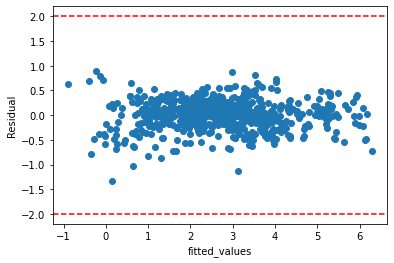

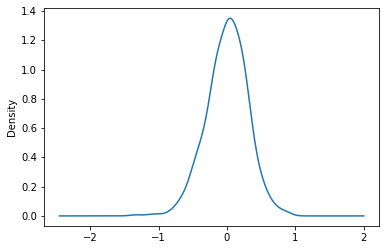

KstestResult(statistic=0.27578147582450163, pvalue=3.588970246195766e-42)
NormaltestResult(statistic=21.09301871808058, pvalue=2.6285072668993358e-05)
(210.9027701468957, 1.6990128756626658e-44, 63.41045315164538, 2.4468956748618e-53)


In [33]:
#检验数据准备
fey = panel['SARH_log']
fex = panel[['FS','GDR','EDU','UR','HPG']]
fitted_values = results_fe.fitted_values

#残差检验
plt.scatter(fitted_values, results_fe.resids)
plt.xlabel('fitted_values')
plt.ylabel('Residual')
plt.axhline(y=2, color='r', linestyle='--')
plt.axhline(y=-2, color='r', linestyle='--') 
plt.show()

#残差正态性检验
plt.figure()
results_fe.resids.plot.density()
plt.show()
kstest = scipy.stats.kstest(results_fe.resids,cdf = "norm")
normaltest = scipy.stats.normaltest(results_fe.resids)
print(kstest)
print(normaltest)

#残差方差齐性检验
#第一个值为LM统计量；第二个值是统计量对应的概率p值；第三个值为F统计量，用于检验残差平方项与自变量之间是否独立，如果独立则表明残差方差齐性；第四个值则为F统计量的概率p值，同样大于0.05，则进一步表示残差项满足方差齐性的假设。
BP_test = statsmodels.stats.diagnostic.het_breuschpagan(exog_het = fex, resid = results_fe.resids)
print(BP_test)

In [59]:
print(results_fe.params)
print(results_fe.idiosyncratic)

EDU   -4.040892
FS    -0.306838
GDR   -2.908226
HPG    0.477276
UR     8.901067
Name: parameter, dtype: float64
                    idiosyncratic
province      year               
Beijing       2002       0.332725
Tianjin       2002      -0.457027
Hebei         2002      -0.188408
Shanxi        2002      -0.155270
InnerMongolia 2002      -0.354258
...                           ...
Shaanxi       2021      -0.026108
Gansu         2021       0.265583
Qinghai       2021      -0.439183
Ningxia       2021      -0.621798
Xinjiang      2021      -0.205661

[620 rows x 1 columns]


In [35]:
#Read data
UR = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/data_clean/URB.csv',index_col=0)
EDU = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/data_clean/EDU.csv',index_col=0)
GDR = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/province/GDR.csv',index_col=0)
FS = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/data_clean/FAM.csv',index_col=0)
HPG = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/province/HPG.csv',index_col=0)

UR = UR.reindex(index=UR.index[::-1])
EDU = EDU.reindex(index=EDU.index[::-1])
GDR = GDR.reindex(index=GDR.index[::-1])
FS = FS.reindex(index=FS.index[::-1])
HPG = HPG.reindex(index=HPG.index[::-1])

In [36]:
#ADF Test
for province in UR.columns:
    series = UR[province]
    adfullerresult = adfuller(series)
    print(province + " KPSS Test Statistic: {:.3f}".format(adfullerresult[0]))
    print(province + " p-value: {:.3f}".format(adfullerresult[1]))

#KPSS Test
for province in UR.columns:
    series = UR[province]
    kpssresult = kpss(series)
    print(province + ' ADF Statistic: %f' % kpssresult[0])
    print(province + ' p-value: %f' % kpssresult[1])

Beijing KPSS Test Statistic: -6.038
Beijing p-value: 0.000
Tianjin KPSS Test Statistic: -8.545
Tianjin p-value: 0.000
Hebei KPSS Test Statistic: 1.495
Hebei p-value: 0.998
Shanxi KPSS Test Statistic: -0.263
Shanxi p-value: 0.931
InnerMongolia KPSS Test Statistic: -1.499
InnerMongolia p-value: 0.534
Liaoning KPSS Test Statistic: -0.559
Liaoning p-value: 0.880
Jilin KPSS Test Statistic: 0.481
Jilin p-value: 0.984
Heilongjiang KPSS Test Statistic: 0.707
Heilongjiang p-value: 0.990
Shanghai KPSS Test Statistic: -3.140
Shanghai p-value: 0.024
Jiangsu KPSS Test Statistic: -1.651
Jiangsu p-value: 0.457
Zhejiang KPSS Test Statistic: -0.604
Zhejiang p-value: 0.870
Anhui KPSS Test Statistic: -7.832
Anhui p-value: 0.000
Fujian KPSS Test Statistic: 0.538
Fujian p-value: 0.986
Jiangxi KPSS Test Statistic: -1.882
Jiangxi p-value: 0.341
Shandong KPSS Test Statistic: 0.635
Shandong p-value: 0.988
Henan KPSS Test Statistic: -23.926
Henan p-value: 0.000
Hubei KPSS Test Statistic: -0.436
Hubei p-value: 0

C:\Users\xianl\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\Users\xianl\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\Users\xianl\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\Users\xianl\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range

In [52]:
#ARIMA Prediction
#UR Prediction
URP = pd.DataFrame({'province': ['2022','2023','2024','2025','2026','2027']})
for province in UR.columns:
    series = UR[province]
    model = SARIMAX(series, order=(1, 1, 1))
    model_fit = model.fit(disp=False)
    predictions = model_fit.predict(len(series), len(series)+5, typ='levels')
    URP[province] = predictions.values

#EDU Prediction
EDUP = pd.DataFrame({'province': ['2022','2023','2024','2025','2026','2027']})
for province in EDU.columns:
    series = EDU[province]
    model = SARIMAX(series, order=(1, 1, 1))
    model_fit = model.fit(disp=False)
    predictions = model_fit.predict(len(series), len(series)+5, typ='levels')
    EDUP[province] = predictions.values

#GDR Prediction
GDRP = pd.DataFrame({'province': ['2022','2023','2024','2025','2026','2027']})
for province in GDR.columns:
    series = GDR[province]
    model = SARIMAX(series, order=(1, 1, 1))
    model_fit = model.fit(disp=False)
    predictions = model_fit.predict(len(series), len(series)+5, typ='levels')
    GDRP[province] = predictions.values
    
#FS Prediction
FSP = pd.DataFrame({'province': ['2022','2023','2024','2025','2026','2027']})
for province in FS.columns:
    series = FS[province]
    model = SARIMAX(series, order=(1, 1, 1))
    model_fit = model.fit(disp=False)
    predictions = model_fit.predict(len(series), len(series)+5, typ='levels')
    FSP[province] = predictions.values
    
#HPG Prediction
HPGP = pd.DataFrame({'province': ['2022','2023','2024','2025','2026','2027']})
for province in HPG.columns:
    series = HPG[province]
    model = SARIMAX(series, order=(1, 1, 1))
    model_fit = model.fit(disp=False)
    predictions = model_fit.predict(len(series), len(series)+5, typ='levels')
    HPGP[province] = predictions.values
    
URP = URP.T
URP.columns = URP.iloc[0]
URP = URP[1:]

EDUP = EDUP.T
EDUP.columns = EDUP.iloc[0]
EDUP = EDUP[1:]

GDRP = GDRP.T
GDRP.columns = GDRP.iloc[0]
GDRP = GDRP[1:]

FSP = FSP.T
FSP.columns = FSP.iloc[0]
FSP = FSP[1:]

HPGP = HPGP.T
HPGP.columns = HPGP.iloc[0]
HPGP = HPGP[1:]

PRE22 = pd.DataFrame({'province': URP.index, 'UR': URP['2022'], 'EDU': EDUP['2022'], 'GDR': GDRP['2022'], 'FS': FSP['2022'], 'HPG': HPGP['2022']})
PRE23 = pd.DataFrame({'province': URP.index, 'UR': URP['2023'], 'EDU': EDUP['2023'], 'GDR': GDRP['2023'], 'FS': FSP['2023'], 'HPG': HPGP['2023']})
PRE24 = pd.DataFrame({'province': URP.index, 'UR': URP['2024'], 'EDU': EDUP['2024'], 'GDR': GDRP['2024'], 'FS': FSP['2024'], 'HPG': HPGP['2024']})
PRE25 = pd.DataFrame({'province': URP.index, 'UR': URP['2025'], 'EDU': EDUP['2025'], 'GDR': GDRP['2025'], 'FS': FSP['2025'], 'HPG': HPGP['2025']})
PRE26 = pd.DataFrame({'province': URP.index, 'UR': URP['2026'], 'EDU': EDUP['2026'], 'GDR': GDRP['2026'], 'FS': FSP['2026'], 'HPG': HPGP['2026']})
PRE27 = pd.DataFrame({'province': URP.index, 'UR': URP['2027'], 'EDU': EDUP['2027'], 'GDR': GDRP['2027'], 'FS': FSP['2027'], 'HPG': HPGP['2027']})

C:\Users\xianl\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\xianl\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\xianl\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\xianl\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\xianl\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa

ValueError: Length mismatch: Expected 6 rows, received array of length 32